# Assignment

Now create your analytics and derive your conclusions on the **“Madrid Train Bombing Network”**

FOUR kinds of ties linking the individuals involved:
1.   Trust-friendship (contact, kinship, links in the telephone center).
2.   Ties to Al Qaeda and to Osama Bin Laden.
3. Co-participation in training camps or wars.
4. Co-participation in previous terrorist attacks (Sept 11, Casablanca).

These four were added together providing a *“strength of connection”* index
that ranges from 1 to 4. 

In [ ]:
!sudo apt install build-essential python-dev libxml2 libxml2-dev zlib1g-dev
!sudo pip install cairocffi
!pip install python-igraph
!pip install louvain

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python-dev is already the newest version (2.7.15~rc1-1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libxml2 is already the newest version (2.9.4+dfsg1-6.1ubuntu1.3).
libxml2 set to manually installed.
libxml2-dev is already the newest version (2.9.4+dfsg1-6.1ubuntu1.3).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
     |████████████████████████████████| 71kB 2.1MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.1.0-cp36-none-any.whl size=88590 sha256=7b5b46315ac2d7f111a9d341fb90b02661585ba9bf48c6f15e4ba72440a262c8
  Stored in directory: /root/.cache/pip/wheels/11/5e/47/167d9dfd5fa5850dd0cd3db80afe6db46e620edec3419dce5a
Successfully built cairocffi
     |████████████████████████████████| 3.2MB 2.8MB/s 
     |████████████████████████████████| 92kB

In [ ]:
!mv __init__.py /usr/local/lib/python3.6/dist-packages/igraph/drawing

In [ ]:
# Networks
import igraph as ig
import louvain
# Computation
import numpy as np
np.random.seed(0)
# Data
import pandas as pd
import csv

In [ ]:
# https://igraph.org/python/doc/igraph.Graph-class.html
g=ig.Graph.Read_Ncol("madrid-edges.dat",names=True)
n = g.vcount()
m = g.ecount()
print('Graph: {0} nodes, {1} edges'.format(n, m))

Graph: 64 nodes, 486 edges


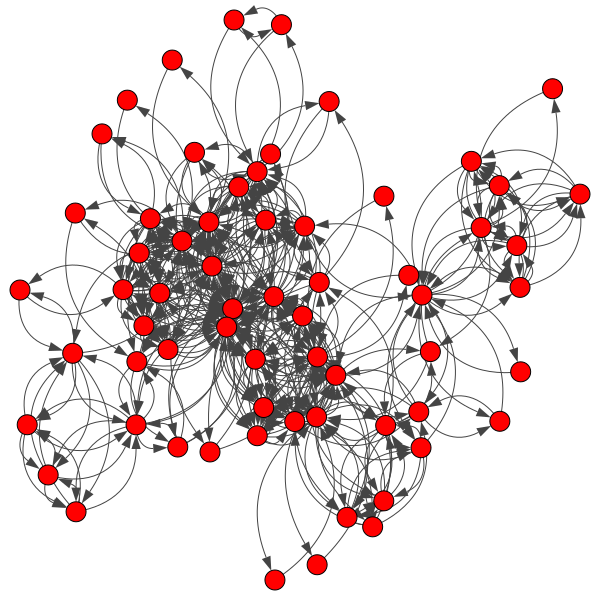

In [ ]:
ig.plot(g)

In [ ]:
#print(g)
print('Attributes of vertex: {0}'.format(g.vs.attribute_names()))
print('Attributes of edges: {0}'.format(g.es.attribute_names()))

Attributes of vertex: ['name']
Attributes of edges: ['weight']


In [ ]:
pagerank_nodes = []
g.vs['pagerank'] = g.pagerank(g.vs)
print('Top 5 MAX PageRank in G: {0}'.format(sorted(g.vs.get_attribute_values('pagerank'), reverse=True)[:5]))
for pagerank in sorted(g.vs.get_attribute_values('pagerank'), reverse=True)[:5]:
    pagerank_nodes.append(g.vs.select(pagerank = pagerank)["name"])

print('Top 5 vertex_name with MAX PageRank Centralities in G:')
print(pagerank_nodes)

Top 5 MAX PageRank in G: [0.048779675613737986, 0.04510997898955545, 0.03981709583141367, 0.03151080352905178, 0.031053556554647324]
Top 5 vertex_name with MAX PageRank Centralities in G:
[['1'], ['3'], ['7'], ['24'], ['11']]


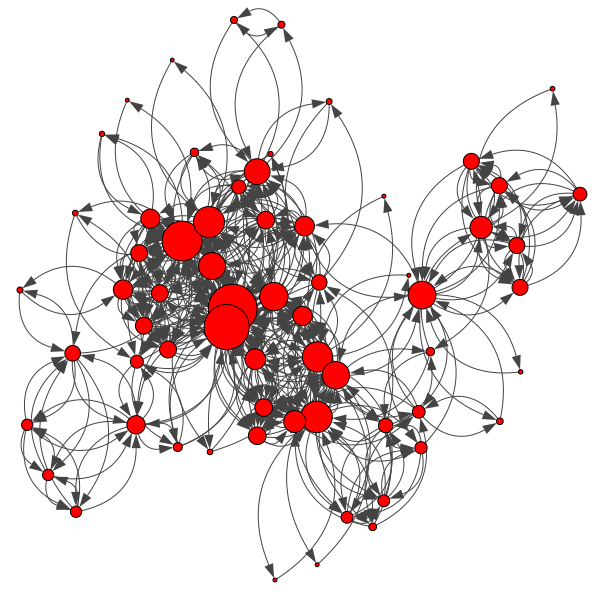

In [ ]:
ig.plot(g, main="PageRank Centralities in G", vertex_size=1000*np.array(g.vs['pagerank']))

In [ ]:
#g.to_undirected()

In [ ]:
degree_nodes = []
g.vs['degree'] = g.degree(g.vs)
print('Top 5 MAX Degree in G: {0}'.format(sorted(g.vs.get_attribute_values('degree'), reverse=True)[:5]))
for degree in sorted(g.vs.get_attribute_values('degree'), reverse=True)[:5]:
    degree_nodes.append(g.vs.select(degree = degree)["name"])

print('Top 5 vertex_name with MAX Degree in G:')
print(degree_nodes)

Top 5 MAX Degree in G: [58, 54, 44, 36, 34]
Top 5 vertex_name with MAX Degree in G:
[['1'], ['3'], ['7'], ['11'], ['41']]


In [ ]:
# from list of lists of strings to list of number
degree_nodes = [item for items in degree_nodes for item in items]
degree_nodes = list(map(int, degree_nodes))
#print(degree_nodes)

In [ ]:
# https://igraph.org/python/doc/igraph.EdgeSeq-class.html
i = 0
sum = np.zeros(len(degree_nodes))

for node in degree_nodes:
  print('Vertex_name: {0}'.format(node))
  edges = []
  edges = g.es.select(_between = ([node-1], g.vs))
  for edge in edges:
    sum[i] = sum[i] + edge["weight"]
  print('Total weight: {0}'.format(sum[i]))
  i = i+1

Vertex_name: 1
Total weight: 86.0
Vertex_name: 3
Total weight: 68.0
Vertex_name: 7
Total weight: 70.0
Vertex_name: 11
Total weight: 20.0
Vertex_name: 41
Total weight: 10.0


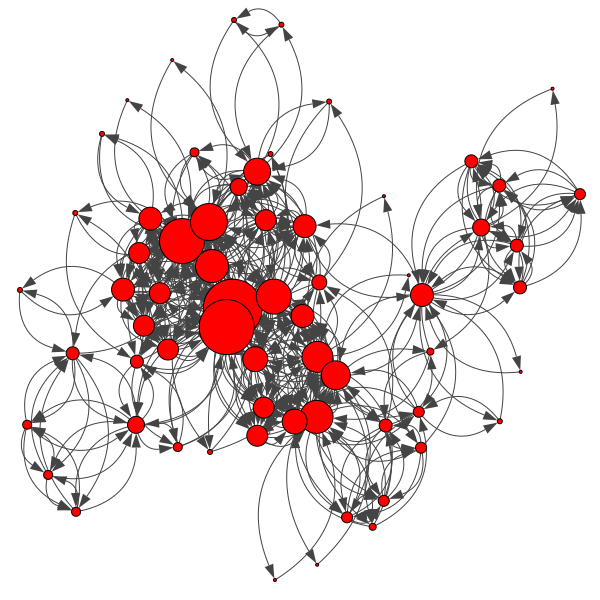

In [ ]:
ig.plot(g, main="Degree in G", vertex_size=1*np.array(g.vs['degree']) + 1)

In [ ]:
closeness_nodes = []
g.vs['closeness'] = g.closeness(g.vs)
print('Top 5 MAX Closeness in G: {0}'.format(sorted(g.vs.get_attribute_values('closeness'), reverse=True)[:5]))
for closeness in sorted(g.vs.get_attribute_values('closeness'), reverse=True)[:5]:
    closeness_nodes.append(g.vs.select(closeness = closeness)["name"])
print('Top 5 vertex_name with MAX Closeness in G:')
print(closeness_nodes)

Top 5 MAX Closeness in G: [0.5833333333333334, 0.5727272727272728, 0.5080645161290323, 0.5, 0.49606299212598426]
Top 5 vertex_name with MAX Closeness in G:
[['1'], ['3'], ['41'], ['7'], ['31']]


In [ ]:
# from list of lists of strings to list of number
closeness_nodes = [item for items in closeness_nodes for item in items]
closeness_nodes = list(map(int, closeness_nodes))
#print(closeness_nodes)

In [ ]:
# https://igraph.org/python/doc/igraph.EdgeSeq-class.html
i = 0
sum = np.zeros(len(closeness_nodes))

for node in closeness_nodes:
  print('Vertex_name: {0}'.format(node))
  edges = []
  edges = g.es.select(_between = ([node-1], g.vs))
  for edge in edges:
    sum[i] = sum[i] + edge["weight"]
  print('Total weight: {0}'.format(sum[i]))
  i = i+1

Vertex_name: 1
Total weight: 86.0
Vertex_name: 3
Total weight: 68.0
Vertex_name: 41
Total weight: 10.0
Vertex_name: 7
Total weight: 70.0
Vertex_name: 31
Total weight: 12.0


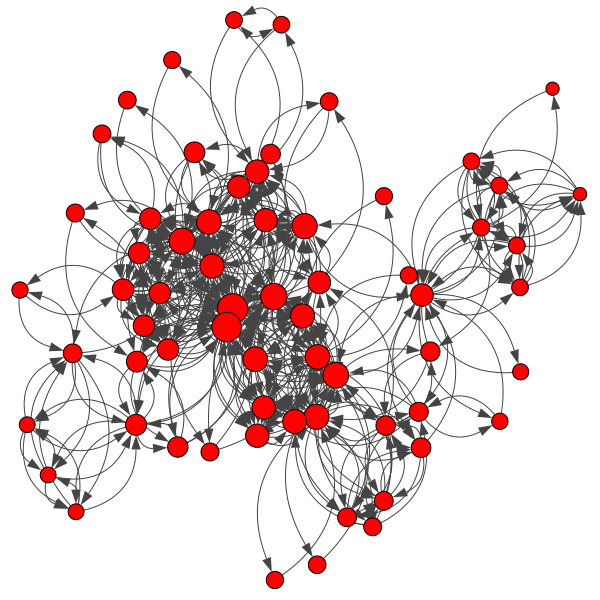

In [ ]:
ig.plot(g, main="Closeness in G", vertex_size=50*np.array(g.vs['closeness']) + 1)

In [ ]:
g.vs['betweenness'] = g.betweenness(g.vs)
print('Top 5 MAX Betweenness in G: {0}'.format(sorted(g.vs.get_attribute_values('betweenness'), reverse=True)[:5]))
print('Top 5 vertex_name with MAX Betweenness in G')
for betweenness in sorted(g.vs.get_attribute_values('betweenness'), reverse=True)[:5]:
    print(g.vs.select(betweenness = betweenness)["name"])

Top 5 MAX Betweenness in G: [897.0401995401994, 784.7043437543435, 641.6763717263717, 537.96957996958, 535.3317522317521]
Top 5 vertex_name with MAX Betweenness in G
['63']
['1']
['3']
['40']
['7']


In [ ]:
betweenness_nodes = []
g.vs['betweenness'] = g.betweenness(g.vs)
print('Top 5 MAX Betweenness in G: {0}'.format(sorted(g.vs.get_attribute_values('betweenness'), reverse=True)[:5]))
for betweenness in sorted(g.vs.get_attribute_values('betweenness'), reverse=True)[:5]:
    betweenness_nodes.append(g.vs.select(betweenness = betweenness)["name"])
print('Top 5 vertex_name with MAX Betweenness in G:')
print(betweenness_nodes)

Top 5 MAX Betweenness in G: [897.0401995401994, 784.7043437543435, 641.6763717263717, 537.96957996958, 535.3317522317521]
Top 5 vertex_name with MAX Betweenness in G:
[['63'], ['1'], ['3'], ['40'], ['7']]


In [ ]:
# from list of lists of strings to list of number
betweenness_nodes = [item for items in betweenness_nodes for item in items]
betweenness_nodes = list(map(int, betweenness_nodes))
#print(betweenness_nodes)

In [ ]:
# https://igraph.org/python/doc/igraph.EdgeSeq-class.html
i = 0
sum = np.zeros(len(betweenness_nodes))
8
for node in betweenness_nodes:
  print('Vertex_name: {0}'.format(node))
  edges = []
  edges = g.es.select(_between = ([node-1], g.vs))
  for edge in edges:
    sum[i] = sum[i] + edge["weight"]
  print('Total weight: {0}'.format(sum[i]))
  i = i+1

Vertex_name: 63
Total weight: 4.0
Vertex_name: 1
Total weight: 86.0
Vertex_name: 3
Total weight: 68.0
Vertex_name: 40
Total weight: 10.0
Vertex_name: 7
Total weight: 70.0


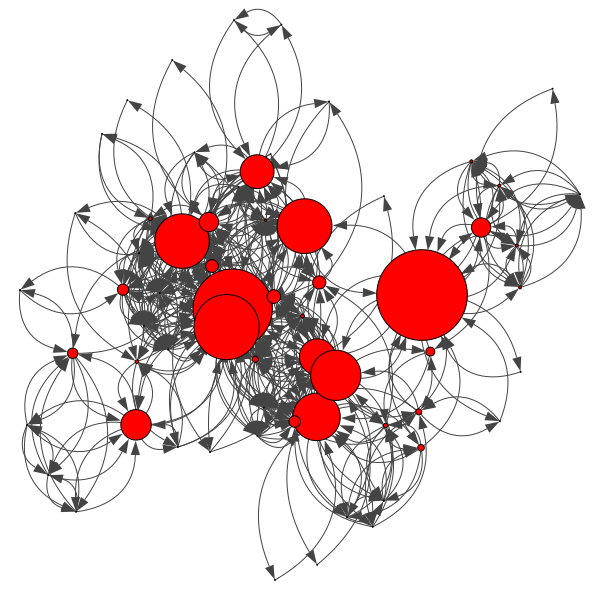

In [ ]:
ig.plot(g, main="Betweenness in G", vertex_size=0.1*np.array(g.vs['betweenness']) + 1)

In [ ]:
g.vs['eigenvector_centralities'] = g.eigenvector_centrality()
print('Top 5 MAX Eigenvector Centralities in G: {0}'.format(sorted(g.vs.get_attribute_values('eigenvector_centralities'), reverse=True)[:5]))
print('Top 5 vertex_name with MAX Eigenvector Centralities in G')
for eigenvector_centralities in sorted(g.vs.get_attribute_values('eigenvector_centralities'), reverse=True)[:5]:
    print(g.vs.select(eigenvector_centralities = eigenvector_centralities)["name"])

Top 5 MAX Eigenvector Centralities in G: [1.0, 0.9716969297598024, 0.7490992510264968, 0.7210238498511503, 0.7162682307262239]
Top 5 vertex_name with MAX Eigenvector Centralities in G
['1']
['3']
['7']
['41']
['11']


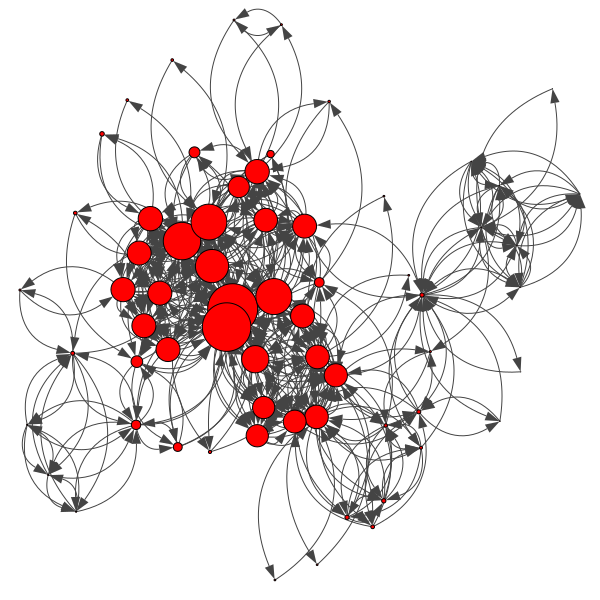

In [ ]:
ig.plot(g, main="Eigenvector Centralities in G", vertex_size=50*np.array(g.vs['eigenvector_centralities']))

In [ ]:
partition_o = g.community_optimal_modularity()
print('Partition Modularity: {0}'.format(partition_o.modularity))
print('Partition Summary: {0}'.format(partition_o.summary()))
print('Partition Sizes: {0}'.format(partition_o.sizes()))

g.vs['membership_o'] = partition_o.membership

Partition Modularity: 0.4485850734136053
Partition Summary: Clustering with 64 elements and 5 clusters
Partition Sizes: [19, 20, 6, 9, 10]


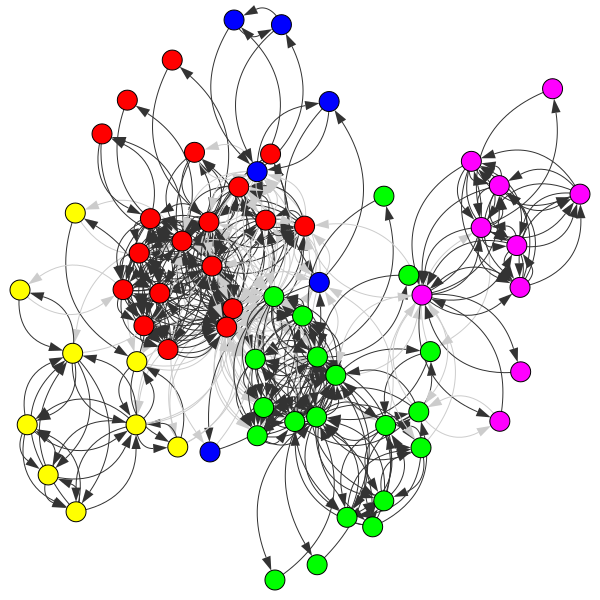

In [ ]:
ig.plot(partition_o)

In [ ]:
partition0 = g.vs.select(membership_o = 0)["name"]
partition1 = g.vs.select(membership_o = 1)["name"]
partition2 = g.vs.select(membership_o = 2)["name"]
partition3 = g.vs.select(membership_o = 3)["name"]
partition4 = g.vs.select(membership_o = 4)["name"]

In [ ]:
print('Partition0 Cohesion: {0}'.format(g.subgraph(partition0).cohesion()))

Partition0 Cohesion: 1


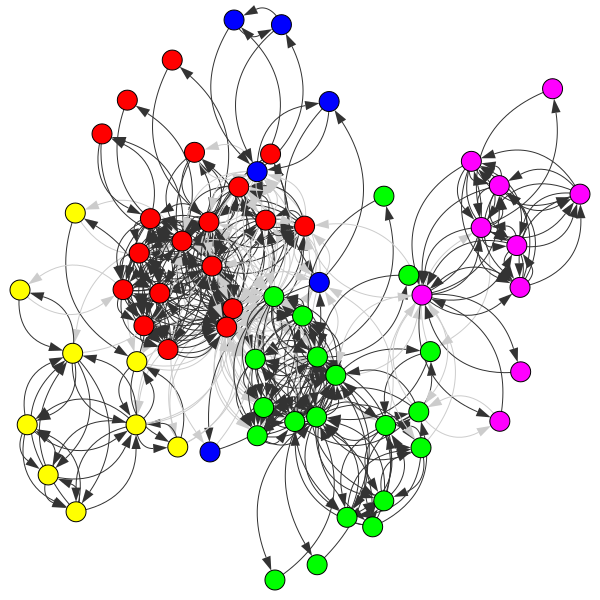

In [ ]:
partition_o = g.community_optimal_modularity()
ig.plot(partition_o)

In [ ]:
print('Partition0 Density: {0}'.format(g.subgraph(partition0).density()))
print('Partition1 Density: {0}'.format(g.subgraph(partition1).density()))
print('Partition2 Density: {0}'.format(g.subgraph(partition2).density()))
print('Partition3 Density: {0}'.format(g.subgraph(partition3).density()))
print('Partition4 Density: {0}'.format(g.subgraph(partition4).density()))

Partition0 Density: 0.4795321637426901
Partition1 Density: 0.3105263157894737
Partition2 Density: 0.4
Partition3 Density: 0.4166666666666667
Partition4 Density: 0.5111111111111111


In [ ]:
print('MAX Closeness in Partition0: {0}'.format(max(g.closeness())))
print('Vertex_name with MAX Closeness in G: {0}'.format(g.vs.select(closeness = max(g.closeness()))["name"]))

MAX Closeness in Partition0: 0.5833333333333334
Vertex_name with MAX Closeness in G: ['1']


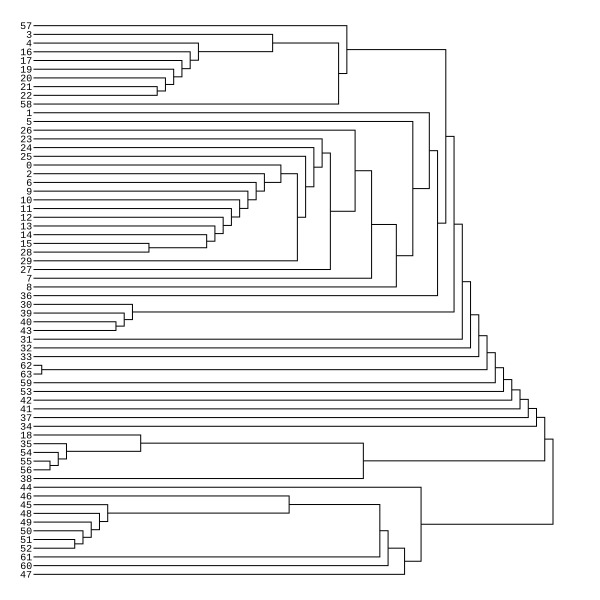

In [ ]:
g.to_undirected()
dendrogram = g.community_edge_betweenness()
ig.plot(dendrogram)

In [ ]:
dendrogram.summary()

'Dendrogram, 64 elements, 63 merges'

In [ ]:
print('Dendrogram optimal_count: {0}'.format(dendrogram.optimal_count))

Dendrogram optimal_count: 15
